In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
np.random.seed(42)

np_class_0 = 900
np_class_1 = 100

class_0 = pd.DataFrame({
    "feature_1": np.random.normal(0, 1, np_class_0),
    "feature_2": np.random.normal(0, 1, np_class_0),
    "target":0
})

class_1 = pd.DataFrame({
    "feature_1": np.random.normal(5, 1, np_class_1),
    "feature_2": np.random.normal(5, 1, np_class_1),
    "target":1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)
df.describe()

,feature_1,feature_2,target
count,1000.000000,1000.000000,1000.00000
mean,0.511630,0.578538,0.10000
std,1.772407,1.806432,0.30015
min,-3.241267,-2.921350,0.00000
25%,-0.574156,-0.502734,0.00000
50%,0.150348,0.197755,0.00000
75%,0.954287,1.056118,0.00000
max,6.901191,8.137749,1.00000


Up Sampling

In [52]:
from sklearn.utils import resample
df_minority = df[df["target"] == 1]
df_majority = df[df["target"] == 0]

df_minority_updated  = resample(df_minority, replace = True, n_samples = 900, random_state = 42)

df_minority_updated.shape

df_upcaled = pd.concat([df_majority, df_minority_updated]).reset_index(drop=True)
df_upcaled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

Down Sampling

In [53]:
from sklearn.utils import resample
df_minority = df[df["target"] == 1]
df_majority = df[df["target"] == 0]

df_majority_updated  = resample(df_majority, n_samples = 100, random_state = 42)

df_majority_updated.shape

df_downsampled = pd.concat([df_majority_updated, df_minority]).reset_index(drop=True)
df_downsampled["target"].value_counts()

target
0    100
1    100
Name: count, dtype: int64

SMOTE ( Systhetic Minority OverSampling Technique)

In [54]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples= 1000,n_features= 2,n_clusters_per_class= 1,weights= [0.90],random_state= 12, n_redundant= 0)

df1 = pd.DataFrame(X,columns= ["feature1","feature2"])
df2 = pd.DataFrame(y,columns= ["target"])
df_over = pd.concat([df1,df2],axis= 1)
df_over["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

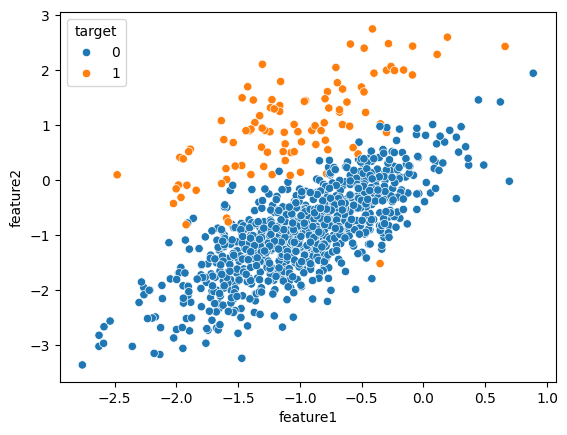

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot( x="feature1", y="feature2", hue="target", data=df_over)
plt.show()


In [56]:
from imblearn.over_sampling import SMOTE

oversmpled = SMOTE()
X_oversampled, y_oversampled = oversmpled.fit_resample(df1[["feature1", "feature2"]], df2["target"])
X_oversampled.shape, y_oversampled.shape

oversampled_df = pd.concat([X_oversampled, y_oversampled], axis=1)
oversampled_df["target"].value_counts()


target
0    900
1    900
Name: count, dtype: int64

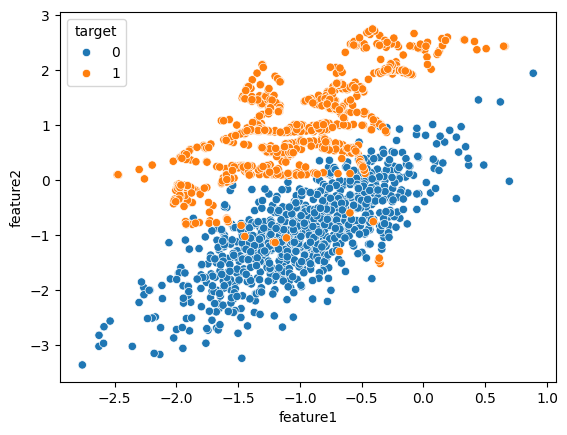

In [57]:
sns.scatterplot( x="feature1", y="feature2", hue="target", data=oversampled_df)
plt.show()
